<a href="https://colab.research.google.com/github/umamahabbasi24/ML-internship-second-phase-notebooks/blob/main/News_Topic_Classifier_Using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/fake.csv
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv
/kaggle/input/source-based-news-classification/news_articles.csv
/kaggle/input/textdb3/fake_or_real_news.csv


In [ ]:
try:
    import pycaret
except:
    !pip install pycaret

try:
    import explainerdashboard
except:
    !pip install explainerdashboard

     |████████████████████████████████| 301 kB 4.9 MB/s            
     |████████████████████████████████| 636 kB 53.3 MB/s            
     |████████████████████████████████| 15.6 MB 62.8 MB/s            
     |████████████████████████████████| 114 kB 61.5 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 24.2 MB 33.8 MB/s            
     |████████████████████████████████| 167 kB 32.2 MB/s            
     |████████████████████████████████| 25.9 MB 35.3 MB/s            
     |████████████████████████████████| 10.4 MB 26.6 MB/s            
     |████████████████████████████████| 1.0 MB 57.5 MB/s            
     |████████████████████████████████| 184 kB 69.6 MB/s            
     |████████████████████████████████| 14.8 MB 46.2 MB/s            
     |████████████████████████████████| 79 kB 4.7 MB/s             
     |████████████████████████████████| 58 kB 3.9 MB/s             
  Preparing metadata (setup.py) ... - done
  Created w

In [ ]:
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora

     |████████████████████████████████| 12.0 MB 5.0 MB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=fb0d43b0402f3a549c9251489e679dfd81ccf9e32df0a3d7816028639344eebf
  Stored in directory: /root/.cache/pip/wheels/b7/0d/f0/7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.1.0
    Uninstalling en-core-web-sm-3.1.0:
      Successfully uninstalled en-core-web-sm-3.1.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_da

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
true_df = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
false_df = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [ ]:
true_df['class'] = 1
false_df['class'] = 0

fake_news_df = pd.concat([true_df,false_df])

In [ ]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
fake_news_df = fake_news_df.sample(10000, random_state=786).reset_index(drop=True)

In [ ]:
fake_news_df.head()

,title,text,subject,date,class
0,Trump Is Now Officially Increasing The Chance...,Republicans aren t very smart about a lot of t...,News,"April 17, 2016",0
1,GAY PAYPAL CEO Gives Rousing Speech Endorsing ...,,politics,"Oct 31, 2016",0
2,"Buoyed by mayoral votes, Venezuela socialists ...",CARACAS (Reuters) - President Nicolas Maduro h...,worldnews,"December 10, 2017",1
3,Oklahoma lawmaker apologizes for linking Nativ...,"TULSA, Okla. (Reuters) - An Oklahoma state leg...",politicsNews,"April 28, 2016",1
4,Argentine mid-term campaign pauses after body ...,BUENOS AIRES (Reuters) - Major parties running...,worldnews,"October 18, 2017",1


-----------------------------------------------------
## Checking Target blance

In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['REAL','FAKE']
values = fake_news_df['class'].value_counts()/fake_news_df['class'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

In [ ]:
from pycaret.nlp import *
%time
fake_news_nlp = setup(data = fake_news_df, target = 'text', session_id = 123)

Description,Value
session_id,123
Documents,10000
Vocab Size,34527
Custom Stopwords,False


<span style="color:Blue"> Observation:
    
The size of the vocabulary is 34527.

---------------------------------------------------------
## Latent Dirichlet allocation

![](https://ars.els-cdn.com/content/image/1-s2.0-S0164121218302103-gr6.jpg)

Picture Credit: https://ars.els-cdn.com

> In natural language processing, the latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model.

Ref: https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

In [ ]:
%time
lda = create_model('lda',multi_core=True)

-------------------------------------
## Embedding on the processed text data

In [ ]:
%time
lda_df = assign_model(lda)

-------------------------------------------
## Plotting the trained model

> This function takes a trained model object (optional) and returns a plot based on the inferred dataset by internally calling assign_model before generating a plot. Where a model parameter is not passed, a plot on the entire dataset will be returned instead of one at the topic level. As such, plot_model can be used with or without model. All plots with a model parameter passed as a trained model object will return a plot based on the first topic i.e. ‘Topic 0’. This can be changed using the topic_num param.

Ref: https://pycaret.readthedocs.io/en/latest/api/nlp.html

In [ ]:
plot_model(lda, plot = 'topic_distribution')

<span style="color:Blue"> Observation:
    
Documents related to Topic 2 are the most. Keywords related to Topic 2 include 'say', 'government', 'year', and 'state'.

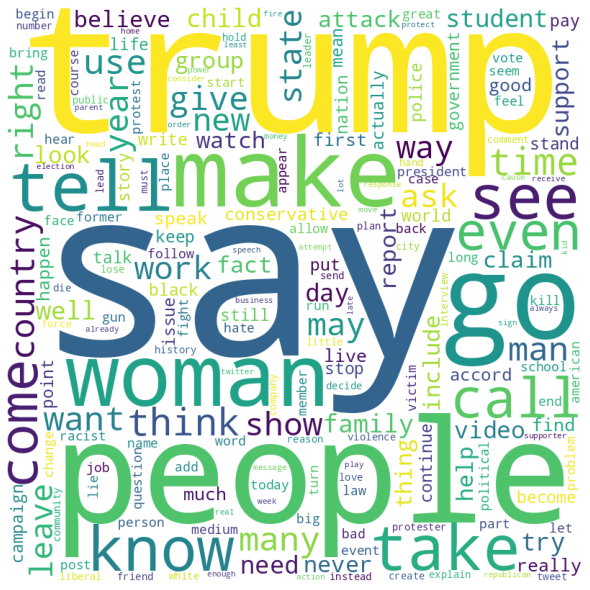

In [ ]:
plot_model(lda, plot = 'wordcloud')

<span style="color:Blue"> Observation:
    
Looking at the word cloud, the selected words look reasonable.

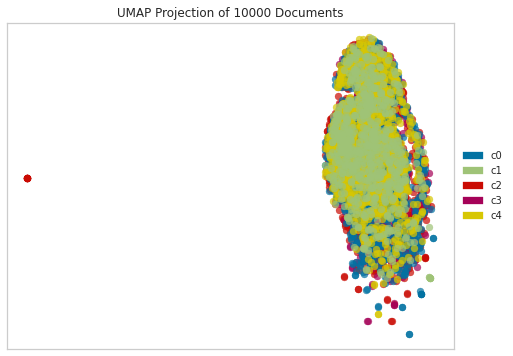

In [ ]:
plot_model(lda, plot = 'umap')

In [ ]:
plot_model(lda, plot = 'tsne')

<span style="color:Blue"> Observation:
    
If you look at the figure separated into dominant topics, you can see that clustering was successful.

In [ ]:
plot_model(lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.143349  0.052958       1        1  32.352492
0      0.085887  0.135703       2        1  25.993255
1      0.144743 -0.043970       3        1  22.517540
3     -0.087281 -0.144690       4        1  19.136712, topic_info=           Term          Freq         Total Category  logprob  loglift
92        trump  18020.000000  18020.000000  Default  30.0000  30.0000
163    election   5104.000000   5104.000000  Default  29.0000  29.0000
366    campaign   4615.000000   4615.000000  Default  28.0000  28.0000
75          say  36949.000000  36949.000000  Default  27.0000  27.0000
186  government   6079.000000   6079.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
385      former   1191.977524   3803.223205   Topic4  -5.4814   0.4933
87         tell   1378.124319   5872.303783   Topic4  -5.3363   0.2040
58       people   1322.299811   9190.599776   Topic4  -5.3776  -0.2852
297        year   1077.778449   6109.804570   Topic4  -5.5821  -0.0814
389       group    968.824866   3565.548420   Topic4  -5.6887   0.3506

[372 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2497      1  0.051424  abortion
2497      2  0.833806  abortion
2497      3  0.104685  abortion
2497      4  0.009183  abortion
429       1  0.304437    accord
...     ...       ...       ...
297       4  0.176438      year
1780      1  0.057551     young
1780      2  0.786537     young
1780      3  0.112545     young
1780      4  0.043483     young

[727 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

----------------------------------------------
# What is n-gram?

> In the fields of computational linguistics and probability, an n-gram (sometimes also called Q-gram) is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles.
>
> Using Latin numerical prefixes, an n-gram of size 1 is referred to as a "unigram"; size 2 is a "bigram" (or, less commonly, a "digram"); size 3 is a "trigram". English cardinal numbers are sometimes used, e.g., "four-gram", "five-gram", and so on. In computational biology, a polymer or oligomer of a known size is called a k-mer instead of an n-gram, with specific names using Greek numerical prefixes such as "monomer", "dimer", "trimer", "tetramer", "pentamer", etc., or English cardinal numbers, "one-mer", "two-mer", "three-mer", etc.

In [ ]:
plot_model(lda, plot = 'bigram')

<span style="color:Blue"> Observation:    

There are many bigrams like 'trump supporter', 'black people', 'many people', 'trump say'.

In [ ]:
plot_model(lda, plot = 'pos')

In [ ]:
lda_df.drop(["text","title", "subject","date"], axis = 1, inplace=True, errors='ignore')

<hr style="border: solid 3px blue;">

# Building Model

![](https://images.squarespace-cdn.com/content/v1/5feb53185d3dab691b47361b/1609930648540-2AG2AUX4BL35UJ6H0PEZ/e2f96-old-header-machine-learning-pt1.gif)

Picture Credit: https://images.squarespace-cdn.com

In [ ]:
from pycaret.classification import *

In [ ]:
%time
setup(data = lda_df,
      target = 'class',
      silent = True)

,Description,Value
0,session_id,2728
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


({'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierContainer at 0x7f1c47bdf490>,
  'knn': <pycaret.containers.models.classification.KNeighborsClassifierContainer at 0x7f1c47bdffd0>,
  'nb': <pycaret.containers.models.classification.GaussianNBClassifierContainer at 0x7f1c47bdfb90>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x7f1c47bdf990>,
  'svm': <pycaret.containers.models.classification.SGDClassifierContainer at 0x7f1c47bdf410>,
  'rbfsvm': <pycaret.containers.models.classification.SVCClassifierContainer at 0x7f1c47be1890>,
  'gpc': <pycaret.containers.models.classification.GaussianProcessClassifierContainer at 0x7f1c47be1f10>,
  'mlp': <pycaret.containers.models.classification.MLPClassifierContainer at 0x7f1c47be1e50>,
  'ridge': <pycaret.containers.models.classification.RidgeClassifierContainer at 0x7f1c47be19d0>,
  'rf': <pycaret.containers.models.classification.RandomForestClassifierContainer at 0x7f1c47bdf110>

-----------------------------------------
## Comparing models

> This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
%time
compare_models(sort='Accuracy',n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8564,0.9293,0.8347,0.8595,0.8466,0.7117,0.7125,0.1280
catboost,CatBoost Classifier,0.8563,0.9318,0.8353,0.8587,0.8466,0.7114,0.7121,2.6260
gbc,Gradient Boosting Classifier,0.8550,0.9322,0.8384,0.8543,0.8458,0.7090,0.7097,0.4190
xgboost,Extreme Gradient Boosting,0.8533,0.9255,0.8353,0.8533,0.8439,0.7055,0.7061,20.4670
rf,Random Forest Classifier,0.8530,0.9237,0.8278,0.8583,0.8425,0.7048,0.7056,0.5350
ada,Ada Boost Classifier,0.8524,0.9289,0.8408,0.8478,0.8440,0.7040,0.7044,0.1310
lr,Logistic Regression,0.8450,0.9212,0.8284,0.8433,0.8354,0.6890,0.6896,0.2110
svm,SVM - Linear Kernel,0.8414,0.0000,0.8173,0.8464,0.8299,0.6815,0.6843,0.0130
lda,Linear Discriminant Analysis,0.8388,0.9188,0.8143,0.8419,0.8275,0.6764,0.6772,0.0120
ridge,Ridge Classifier,0.8383,0.0000,0.8131,0.8417,0.8268,0.6752,0.6760,0.0110


[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=2728, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
         

<span style="color:Blue"> Observation:
    
The catboost classifier has the best performance. Let's use this model!

--------------------------------------
## Creating Model

> This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
catboost = create_model('catboost',verbose = False)

In [ ]:
lightgbm = create_model('lightgbm',verbose = False)

-----------------------------------------------------
## Interpreting Model

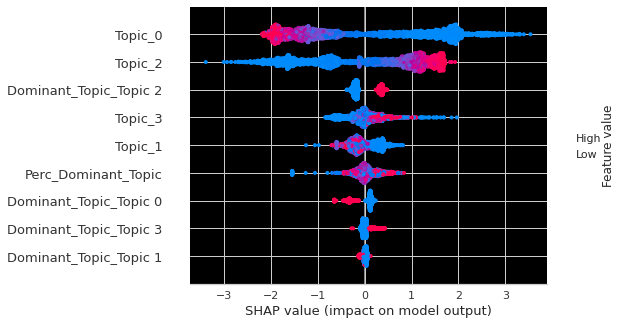

In [ ]:
with plt.rc_context({'axes.facecolor':'black'}):
    interpret_model(catboost)

<span style="color:Blue"> Observation:
    
Topic_0 feature is the most important feature!

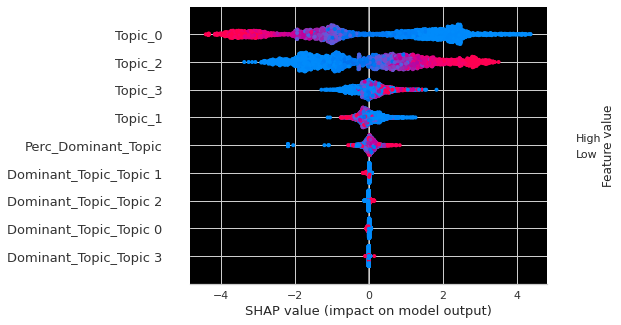

In [ ]:
with plt.rc_context({'axes.facecolor':'black'}):
    interpret_model(lightgbm)

<span style="color:Blue"> Observation:
    
Topic_2 feature is the most important feature!

-----------------------------------
## Tuning Hyperparameters

> This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
%time
tuned_catboost = tune_model(catboost, optimize = 'Accuracy', early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8557,0.9407,0.8348,0.8580,0.8463,0.7104,0.7106
1,0.8429,0.9186,0.7898,0.8680,0.8270,0.6837,0.6862
2,0.8429,0.9268,0.7808,0.8754,0.8254,0.6834,0.6871
3,0.8614,0.9420,0.8739,0.8410,0.8571,0.7227,0.7232
4,0.8286,0.9117,0.7838,0.8447,0.8131,0.6552,0.6567
5,0.8814,0.9491,0.8739,0.8765,0.8752,0.7623,0.7623
6,0.8543,0.9294,0.8468,0.8468,0.8468,0.7079,0.7079
7,0.8557,0.9362,0.8378,0.8558,0.8467,0.7105,0.7106
8,0.8529,0.9322,0.8434,0.8459,0.8446,0.7049,0.7049
9,0.8655,0.9335,0.8494,0.8650,0.8571,0.7301,0.7302


In [ ]:
%time
tuned_lightgbm = tune_model(lightgbm, optimize = 'Accuracy', early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9347,0.8288,0.8652,0.8466,0.7131,0.7136
1,0.8629,0.9208,0.8258,0.8786,0.8514,0.7243,0.7255
2,0.8529,0.9274,0.7988,0.8808,0.8378,0.7037,0.7066
3,0.8629,0.9398,0.8619,0.8516,0.8567,0.7252,0.7253
4,0.8229,0.9091,0.7898,0.8297,0.8092,0.6441,0.6448
5,0.8686,0.9445,0.8589,0.8640,0.8614,0.7364,0.7365
6,0.8457,0.9217,0.8498,0.8299,0.8398,0.6910,0.6912
7,0.8586,0.9326,0.8619,0.8441,0.8529,0.7167,0.7169
8,0.8543,0.9280,0.8614,0.8363,0.8487,0.7082,0.7085
9,0.8498,0.9231,0.8373,0.8450,0.8411,0.6987,0.6987


-----------------------------------
![](https://miro.medium.com/max/873/1*JEywfu11rTcxcLCf7bMtsA.png)

Picture Credit: https://miro.medium.com

> This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list param. The output of this function is a score grid with CV scores by fold.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
blend_soft = blend_models(estimator_list = [lightgbm,catboost], optimize = 'Accuracy',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8686,0.9423,0.8498,0.8708,0.8602,0.7362,0.7364
1,0.8514,0.9167,0.8108,0.8682,0.8385,0.7012,0.7026
2,0.8471,0.9252,0.7898,0.8767,0.8310,0.6921,0.6953
3,0.8714,0.9423,0.8619,0.8671,0.8645,0.7422,0.7422
4,0.8257,0.9147,0.7838,0.8392,0.8106,0.6495,0.6508
5,0.8729,0.9495,0.8679,0.8653,0.8666,0.7451,0.7452
6,0.8557,0.9279,0.8529,0.8452,0.8490,0.7109,0.7109
7,0.8714,0.9332,0.8649,0.8649,0.8649,0.7422,0.7422
8,0.8657,0.9340,0.8584,0.8584,0.8584,0.7307,0.7307
9,0.8612,0.9311,0.8464,0.8593,0.8528,0.7216,0.7216


--------------------------------
## Calibrating Model

> This function calibrates the probability of a given estimator using isotonic or logistic regression.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.

In [ ]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8657,0.9422,0.8438,0.8700,0.8567,0.7304,0.7307
1,0.8529,0.9178,0.8078,0.8734,0.8393,0.7040,0.7058
2,0.8443,0.9273,0.7898,0.8709,0.8283,0.6865,0.6892
3,0.8700,0.9438,0.8619,0.8645,0.8632,0.7393,0.7394
4,0.8329,0.9146,0.7928,0.8462,0.8186,0.6639,0.6652
5,0.8829,0.9503,0.8829,0.8724,0.8776,0.7653,0.7653
6,0.8557,0.9290,0.8498,0.8473,0.8486,0.7108,0.7108
7,0.8671,0.9350,0.8559,0.8636,0.8597,0.7335,0.7336
8,0.8657,0.9367,0.8675,0.8521,0.8597,0.7310,0.7311
9,0.8641,0.9328,0.8554,0.8580,0.8567,0.7275,0.7275


-------------------------
## Finalizing the last model
> This function trains a given estimator on the entire dataset including the holdout set.

Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html

In [ ]:
final_model = finalize_model(cali_model)

----------------------------------------------
## Plotting Results

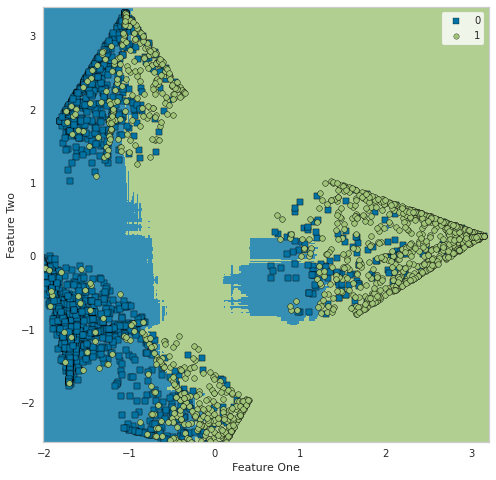

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='boundary')

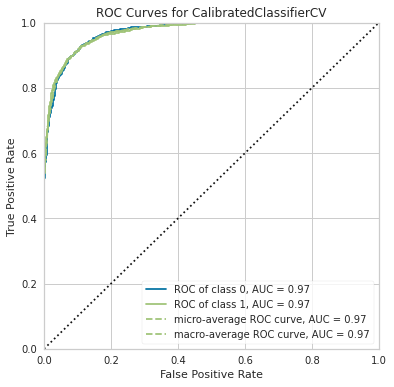

In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='auc')

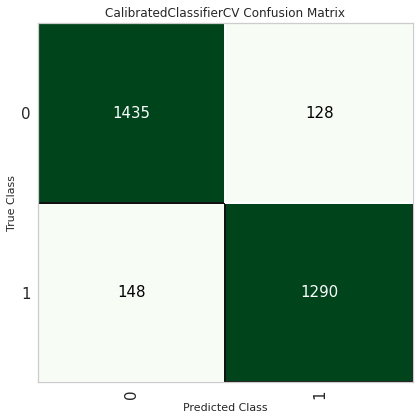

In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='confusion_matrix')

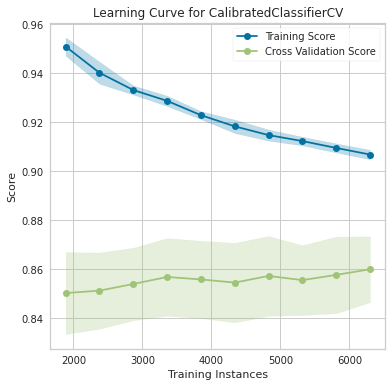

In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='learning')

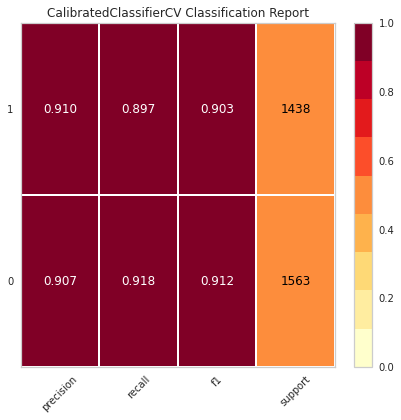

In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='class_report')

<hr style="border: solid 3px blue;">